### <span style="color:deeppink"> Imports </span>

In [2]:
import pandas as pd
import numpy as np
import ast

from sklearn import preprocessing

from matplotlib import pyplot as plt
import seaborn as sb


# <span style="color:darkslategray"> Is 'this' like %% 'that'?</span>

##  <span style="color:darkslategray"> A categorical breakdown </span>

The aim of this project is to design a tool capable of categorising keywords. This file should be used in conjuction with the 'cleaning' file which will generate factor groupings etc. 

### <span style="color:darkslategray"> Load in all file </span>

In [3]:
data = pd.read_csv('nlpSearchLens.csv')

### <span style="color:darkslategray"> Merge & Tidy </span>

In [4]:
# functions

def split_strings(value):
    if pd.isna(value):
        return False
    else:
        return ast.literal_eval(value)

In [5]:
# breakdown factors

catFactor = data['initialCatsFactors'].apply(split_strings)
splitCats = catFactor.apply(pd.Series).iloc[:,1:]

posFactor = data['posFactors'].apply(split_strings)
splitPos = posFactor.apply(pd.Series).iloc[:,1:]

TopWordsFactor = data['topWordsFactors'].apply(split_strings)
splitTop = TopWordsFactor.apply(pd.Series).iloc[:,1:]


# combine into large table
dataWithCat = pd.concat([data, splitCats], axis=1).drop('initialCatsFactors', axis=1)
dataWithPos = pd.concat([dataWithCat, splitPos], axis=1).drop('posFactors', axis=1)
dataFactored = pd.concat([dataWithPos, splitTop], axis=1).drop('topWordsFactors', axis=1)

In [6]:
# normalise
catsHeader = splitCats.columns.values
posHeader = splitPos.columns.values
splitTop = splitTop.columns.values

toNormalised = list(np.concatenate((catsHeader, posHeader)))

factorHeaders = list(np.concatenate((catsHeader, posHeader, splitTop)))
dataFactored[toNormalised] = preprocessing.normalize(dataFactored[toNormalised])

### <span style="color:darkslategray"> Deepdive analysis</span>

In [7]:
def plotHist(dataframe, header, xLabel):
    plt.figure(figsize=(10,6))
    listHeader = list(header)
    palette = sb.color_palette("bright", len(listHeader))

    for index in range(len(listHeader)):
        sb.distplot(dataframe[listHeader[index]], hist=True, kde=False, bins=25, color=palette[index], label=listHeader[index])
    plt.xlim(-0.05)
    plt.legend()
    plt.xlabel(xLabel)
    plt.show()

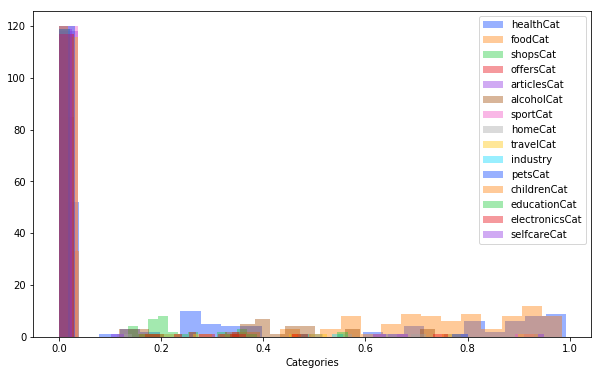

In [8]:
plotHist(dataFactored, catsHeader, 'Categories')

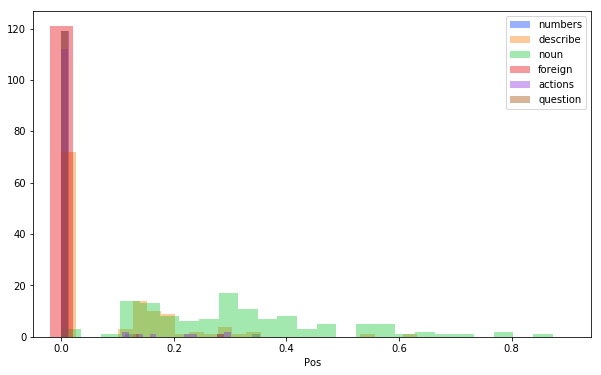

In [9]:
plotHist(dataFactored, posHeader, 'Pos')

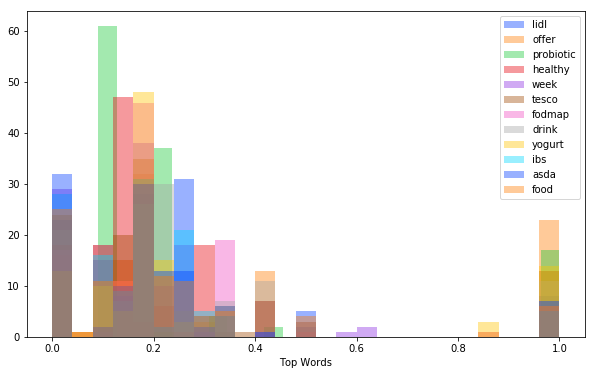

In [10]:
plotHist(dataFactored, splitTop, 'Top Words')

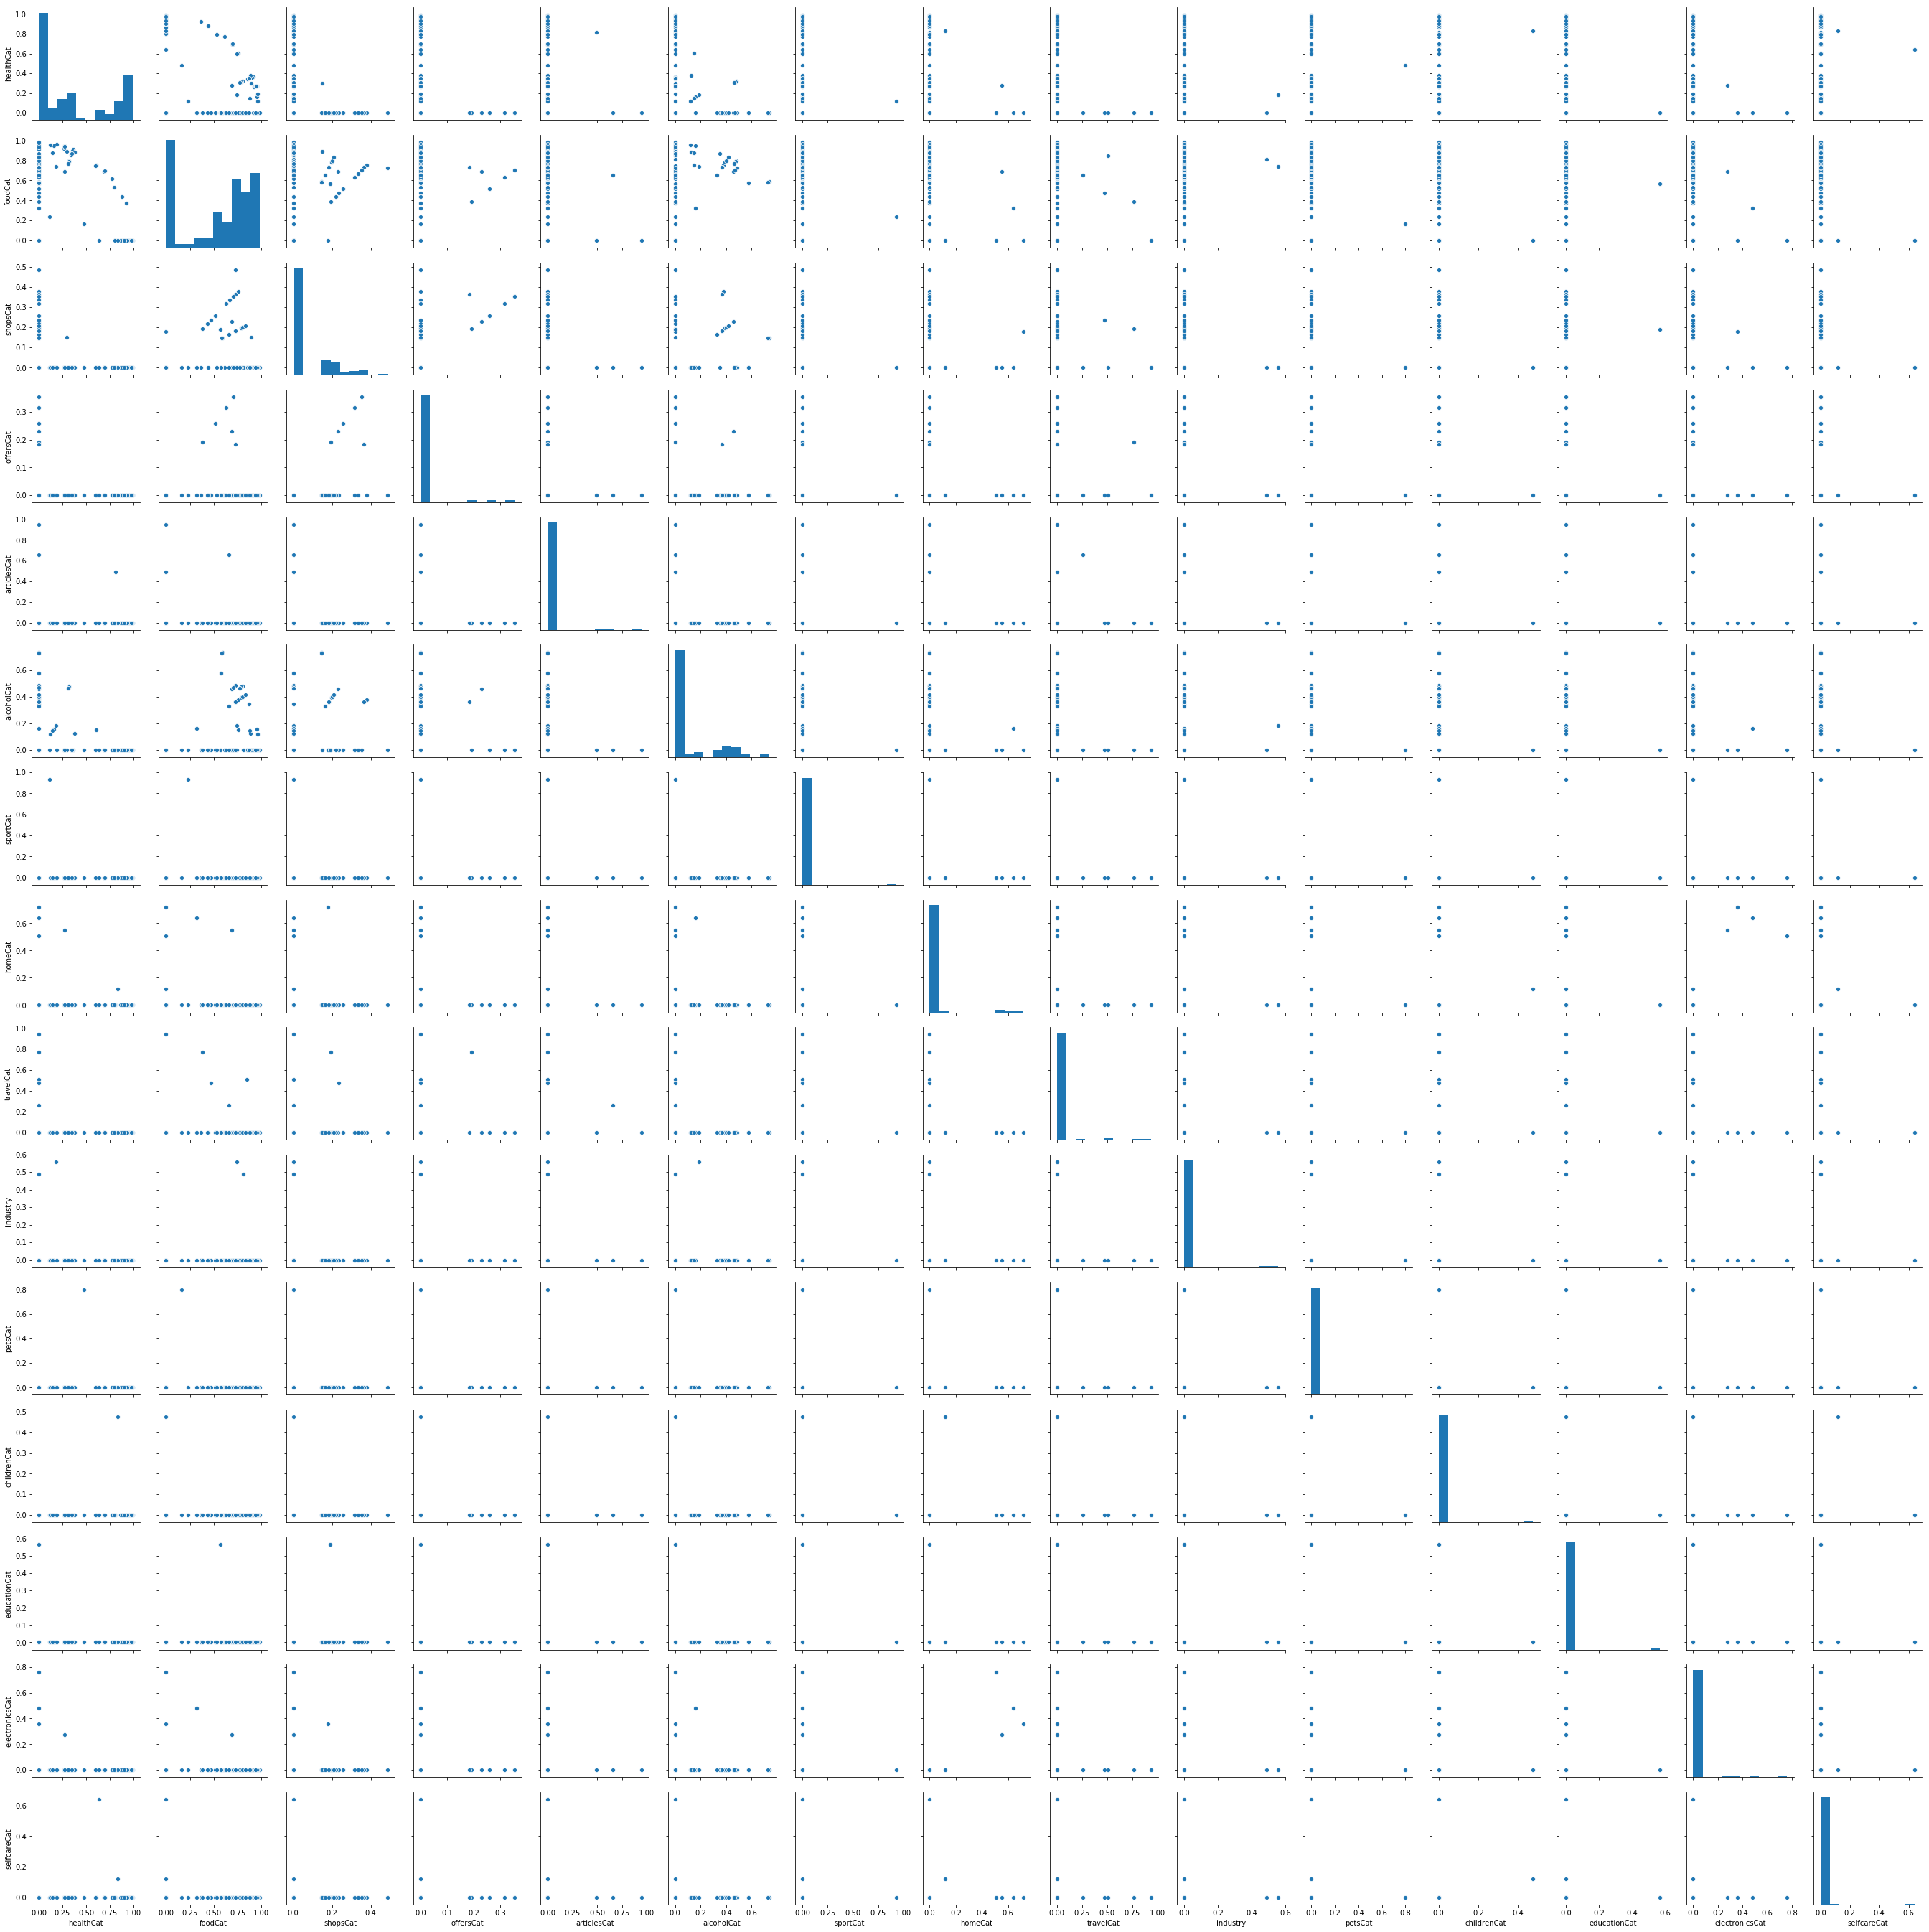

In [20]:
sb.pairplot(dataFactored[list(catsHeader)])

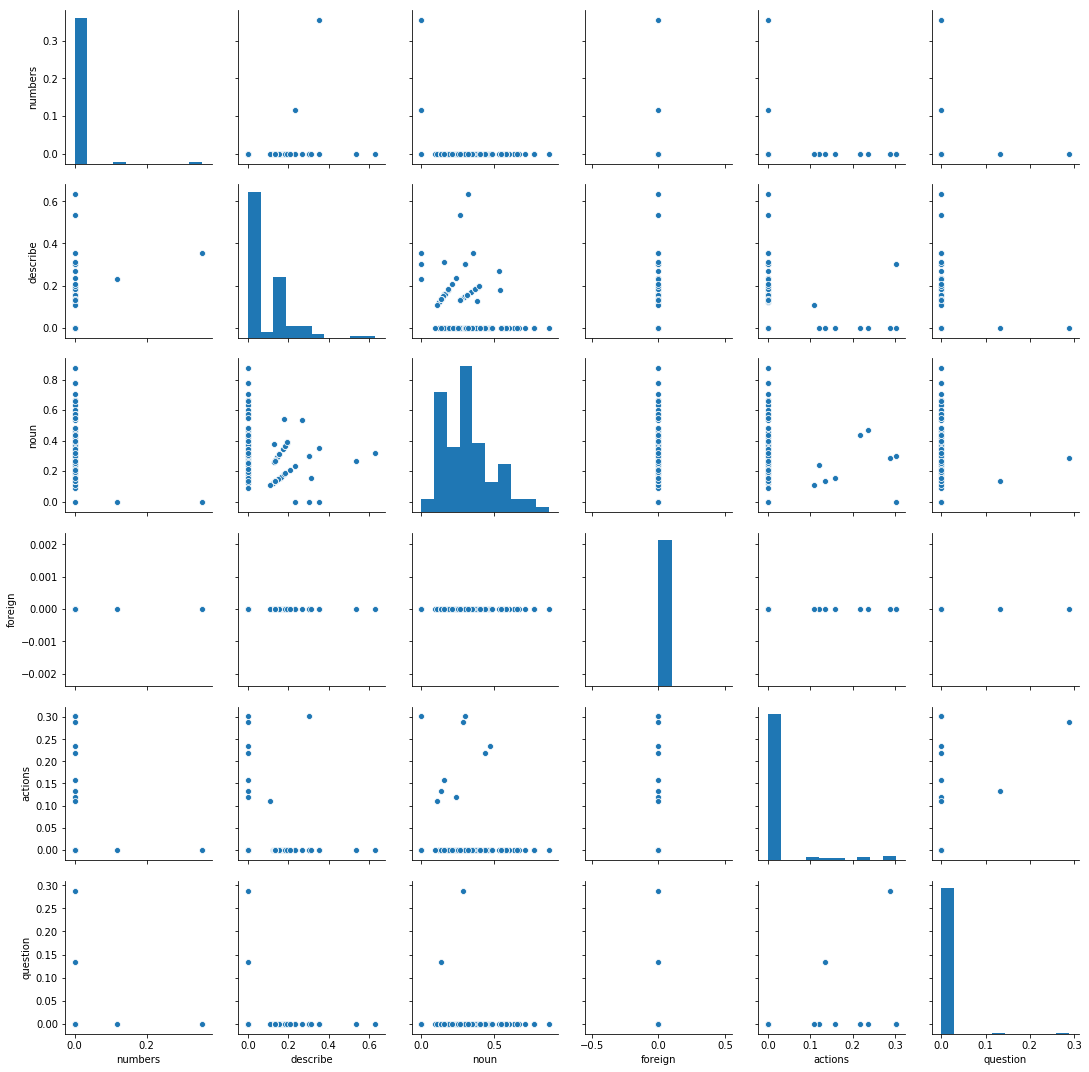

In [23]:
sb.pairplot(dataFactored[list(posHeader)])

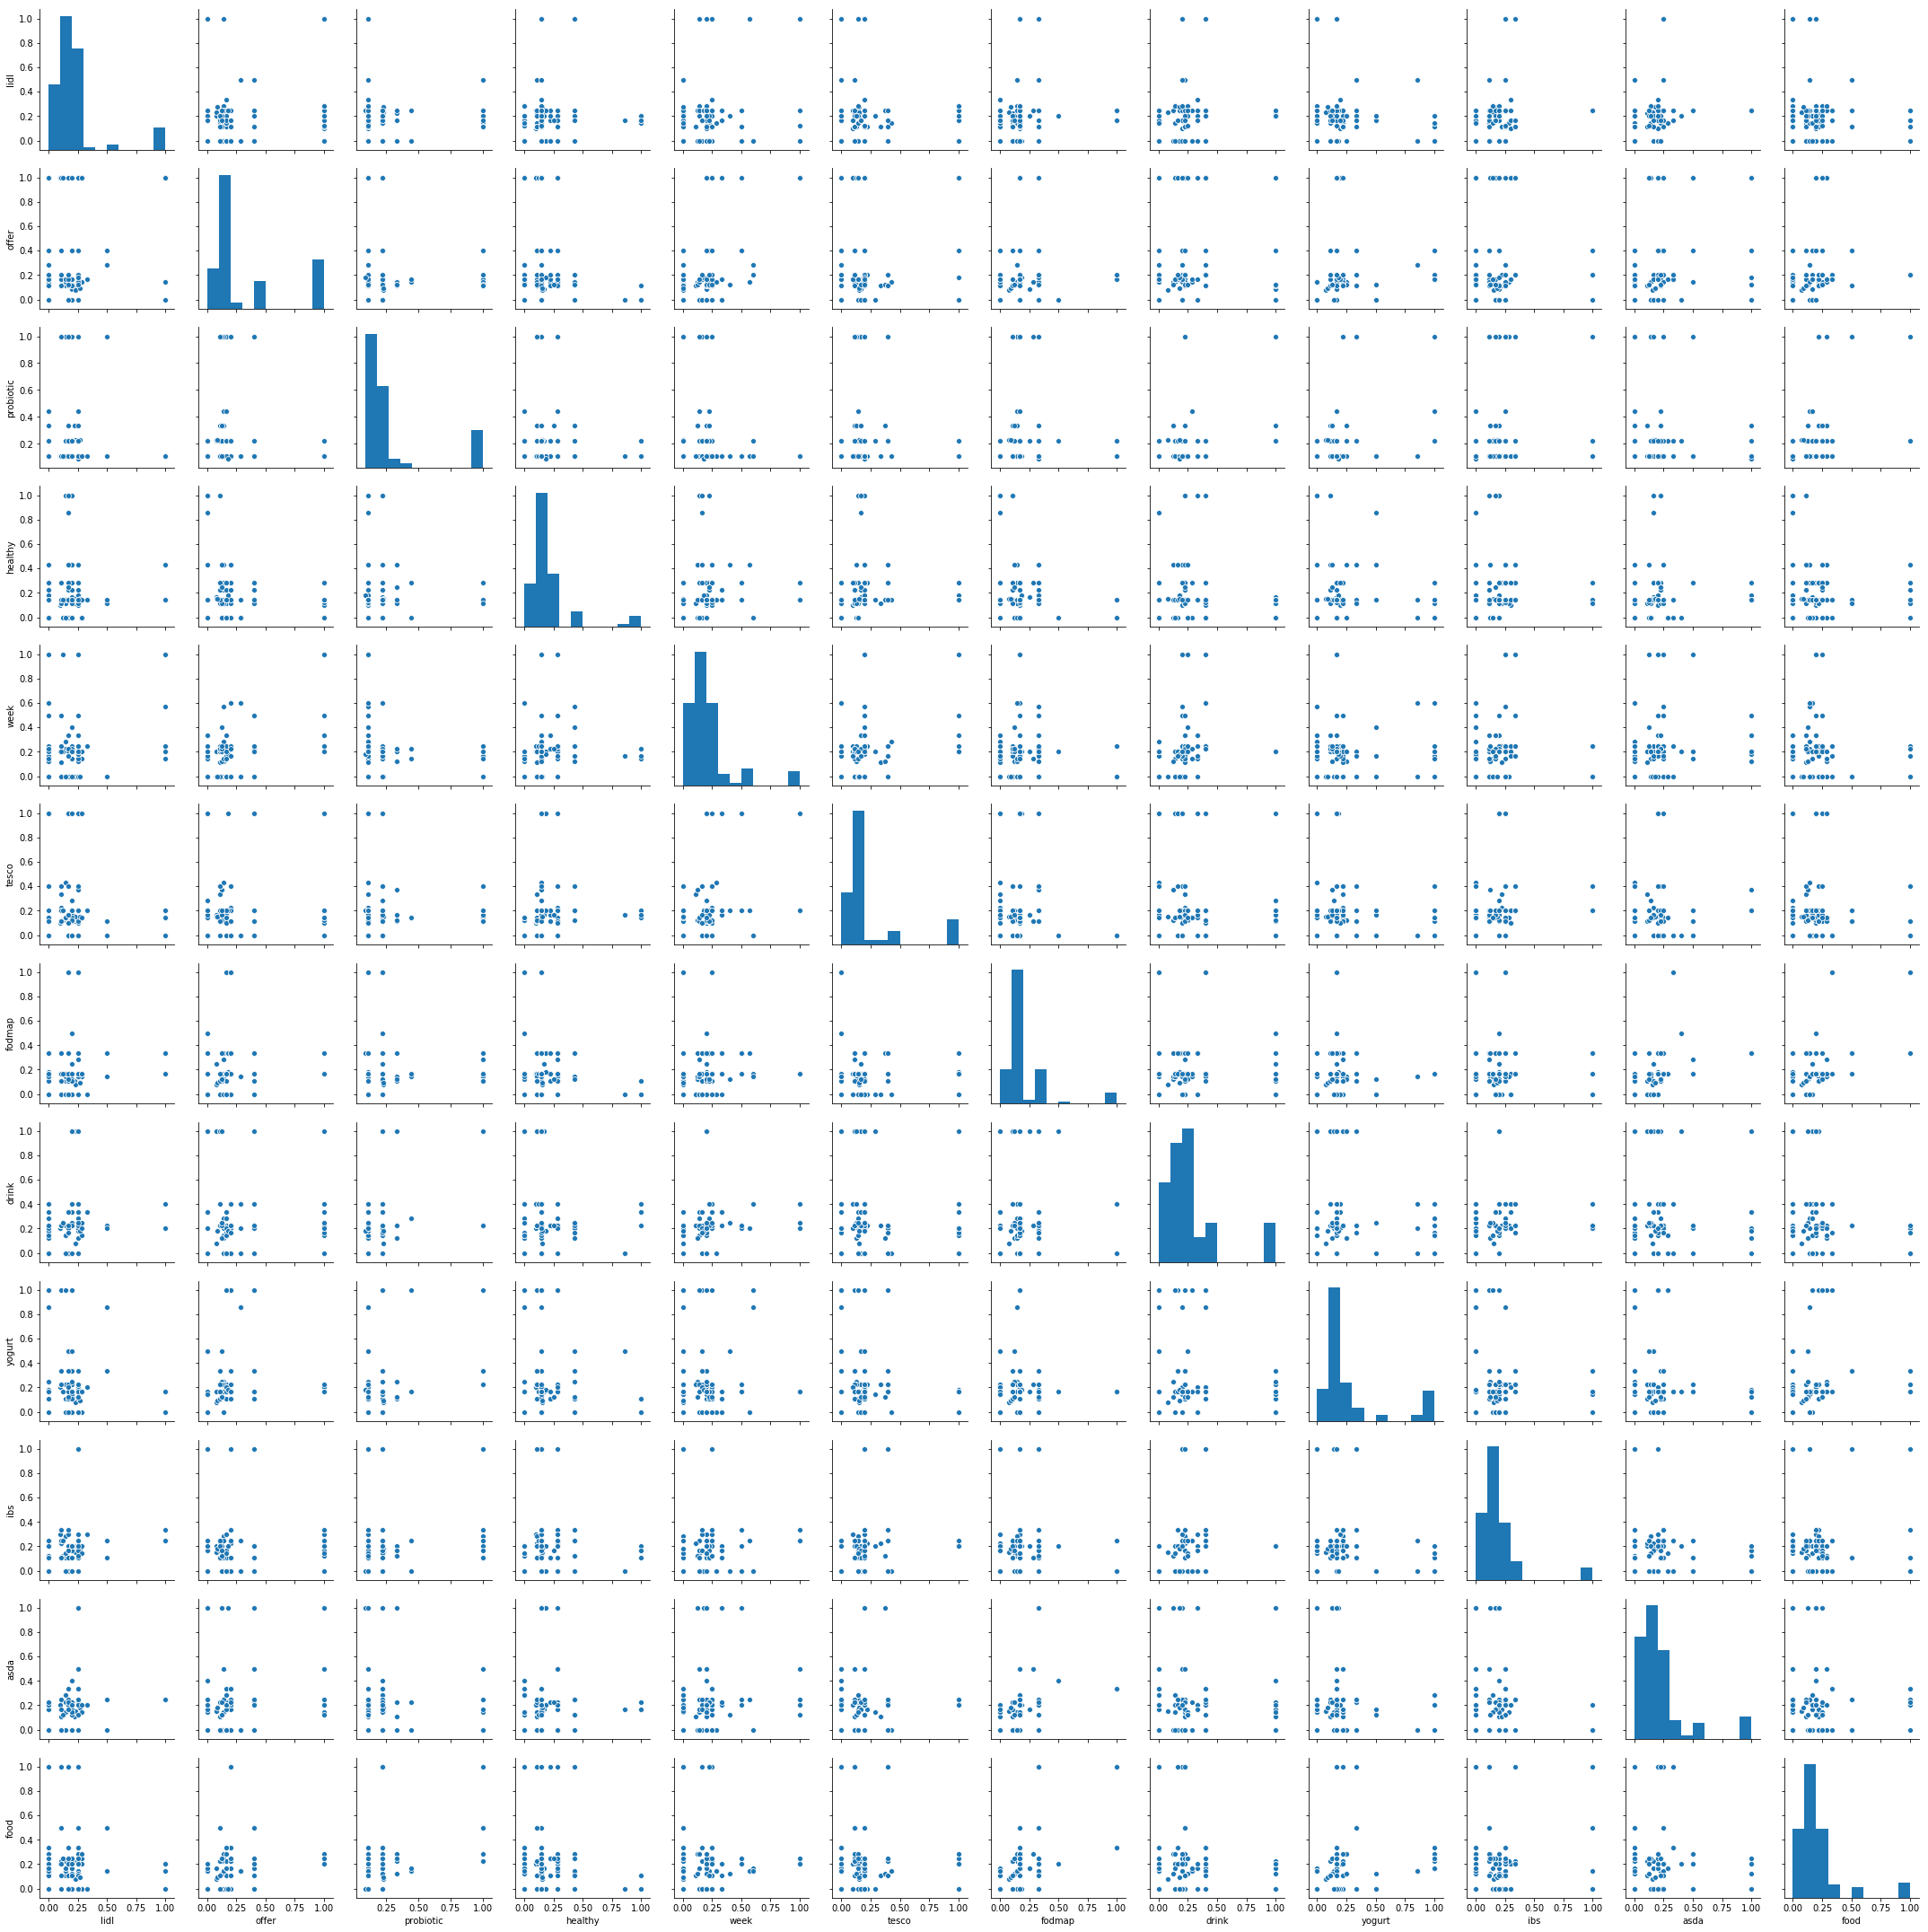

In [21]:
sb.pairplot(dataFactored[list(splitTop)])

### <span style="color:darkslategray"> Build Model </span>

### <span style="color:darkslategray"> Playground </span>

In [86]:
dataFactored

phrase  healthCat   foodCat  shopsCat  offersCat  \
0                         breakfast   0.000000  0.845154  0.000000   0.000000   
1                       lidl offers   0.000000  0.666667  0.333333   0.000000   
2                       aldi offers   0.000000  0.632456  0.316228   0.316228   
3                        probiotics   0.980581  0.000000  0.000000   0.000000   
4                          innocent   0.000000  0.000000  0.000000   0.000000   
5                 healthy breakfast   0.000000  0.973329  0.000000   0.000000   
6             lidl offers this week   0.000000  0.516398  0.258199   0.258199   
7                  morrisons offers   0.000000  0.800000  0.200000   0.000000   
8                      tesco offers   0.000000  0.800000  0.200000   0.000000   
9                       fodmap diet   0.970143  0.000000  0.000000   0.000000   
10                           fodmap   0.986394  0.000000  0.000000   0.000000   
11                     aldi super 6   0.000000  0.707107  0.353553   0.353553   
12                           drinks   0.320256  0.800641  0.000000   0.000000   
13            aldi offers this week   0.000000  0.516398  0.258199   0.258199   
14                tesco wine offers   0.000000  0.583460  0.145865   0.000000   
15                           yogurt   0.272166  0.952579  0.000000   0.000000   
16                          yoghurt   0.272166  0.952579  0.000000   0.000000   
17                         ibs diet   0.942809  0.000000  0.000000   0.000000   
18            sainsburys wine offer   0.000000  0.784465  0.196116   0.000000   
19                      asda offers   0.000000  0.755929  0.377964   0.000000   
20                 alcoholic drinks   0.316228  0.790569  0.000000   0.000000   
21                           yakult   0.771517  0.617213  0.000000   0.000000   
22                 ibs symptoms nhs   0.963087  0.000000  0.000000   0.000000   
23                     tesco whisky   0.000000  0.688247  0.229416   0.229416   
24                lidl special buys   0.000000  0.632456  0.316228   0.000000   
25               cosmopolitan drink   0.000000  0.870388  0.000000   0.000000   
26               innocent smoothies   0.158114  0.948683  0.000000   0.000000   
27                          actimel   0.700140  0.700140  0.000000   0.000000   
28                   aldi super six   0.116248  0.232495  0.000000   0.000000   
29                  low fodmap diet   0.937043  0.000000  0.000000   0.000000   
..                              ...        ...       ...       ...        ...   
91                      fage yogurt   0.192450  0.962250  0.000000   0.000000   
92                     live yoghurt   0.269680  0.943880  0.000000   0.000000   
93             easy breakfast ideas   0.000000  0.937043  0.000000   0.000000   
94             tesco spirits offers   0.000000  0.730297  0.182574   0.000000   
95               sainsburys baileys   0.000000  0.800000  0.200000   0.000000   
96          sainsbury's beer offers   0.000000  0.657596  0.164399   0.000000   
97              my supermarket asda   0.000000  0.566947  0.188982   0.000000   
98                  tesco air fryer   0.000000  0.320256  0.000000   0.000000   
99             easy to digest foods   0.878114  0.439057  0.000000   0.000000   
100              probiotics for ibs   0.976187  0.000000  0.000000   0.000000   
101                     kefir drink   0.377964  0.881917  0.000000   0.000000   
102                  tequila drinks   0.308607  0.771517  0.000000   0.000000   
103       lactobacillus acidophilus   0.904534  0.000000  0.000000   0.000000   
104              how to make yogurt   0.267261  0.935414  0.000000   0.000000   
105                  protein yogurt   0.348155  0.870388  0.000000   0.000000   
106                   greek yoghurt   0.269680  0.943880  0.000000   0.000000   
107                    vegan yogurt   0.269680  0.943880  0.000000   0.000000   
108                  breakfast food   0.000000  0.948683  0.